1. Word clould

2. tokenize and find length of text

3. Countvectorize fit and transform

4. train test split ML mode;

# Course Description
Have you left a review to express how you feel about a product or a service? And do you have a habit of checking a product’s reviews online before you buy it? This kind of information is valuable not only for you but also for companies. In this course, you will learn how to make sense of the sentiment expressed in various documents. You will use real-world datasets featuring tweets, movie and product reviews, and use Python’s nltk and scikit-learn packages. By the end of the course, you will be able to carry an end-to-end sentiment analysis task based on how US airline passengers expressed their feelings on Twitter.

# CHAPTER 1 Sentiment Analysis Nuts and Bolts


Have you ever checked the reviews or ratings of a product or a service before you purchased it? Then you have very likely came face-to-face with sentiment analysis. In this chapter, you will learn the basic structure of a sentiment analysis problem and start exploring the sentiment of movie reviews.



### Elements of a sentiment analysis problem
What are the three typical elements of a sentiment analysis system?

Answer:
Opinion, subject, and opinion holder.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
movies= pd.read_csv('IMDB_sample.csv')
movies.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


### How many positive and negative reviews are there?
As a first step in a sentiment analysis task, similar to other data science problems, we might want to explore the dataset in more detail.

You will work with a sample of the IMDB movies reviews. A dataset called movies has been created for you. It is a sample of the data we saw in the slides. Feel free to explore it in the IPython Shell, calling the .head() method, for example.

Be aware that this exercise uses real data, and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real data).

In [3]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies.label.value_counts() / len(movies))

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


### Longest and shortest reviews
In this exercise, you will continue to work with the movies dataset. You explored how many positive and negative reviews there are. Now your task is to explore the review column in more detail.

In [4]:
length_reviews = movies.review.str.len()

# How long is the longest review
print(max(length_reviews))

10321


In [5]:
length_reviews = movies.review.str.len()

# How long is the shortest review
print(min(length_reviews))

52


## Sentiment analysis types and approaches

Lexicon-based vs ML models

### Detecting the sentiment of Tale of Two Cities
In the video we saw that one type of algorithms for detecting the sentiment are based on a lexicon of predefined words and their corresponding polarity score. Your task in this exercise is to detect the sentiment, including polarity and subjectivity of a given string using such a rule-based approach and the textblob library in Python.

You will work with the two_cities string. It contains the first sentence of Dickens's A Tale of Two Cities novel. Feel free to explore it in the Shell.

In [6]:
two_cities= 'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'
two_cities

'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'

In [7]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment
print(blob_two_cities.sentiment)

#Looking at the string, do you agree with its overall slightly positive score?

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


### Comparing the sentiment of two strings
In this exercise, you will compare the sentiment of two different strings. A string called annak has been defined for you and it contains the first sentence of Anna Karenina. A second string called catcher has been created and it contains the first sentence of The Catcher in the Rye. Feel free to explore both in the IPython Shell.

Your task is again to detect the sentiment of each string - both their polarity and subjectivity. Which one has higher sentiment score? Did you expect that to be the case?

In [8]:
annak= 'Happy families are all alike; every unhappy family is unhappy in its own way'
catcher= "If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth."
print(annak)
print('\n')
print(catcher)

Happy families are all alike; every unhappy family is unhappy in its own way


If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth.


In [9]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


### What is the sentiment of a movie review?
In a previous exercise, you detected the sentiment of the first sentence of the Tale of Two Cities novel by Dickens. Now you will continue to work with the movie reviews dataset. Do you remember how you found the longest and shortest reviews? One of the longest reviews has been imported for you. It is called titanic as it discusses the Titanic movie. Feel free to explore it in the Shell.

Can you calculate the polarity and subjectivity of the titanic string? This review is positive (i.e. has a label of 1). Is the polarity score also positive?

In [10]:
titanic= "Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration of the wreck on television and is flown to the boat where the search is being led from to tell of what she remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic. With this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the passengers are boarding. After another stop on the Irish coast Titanic went out to see on its maiden voyage across the Atlantic bound for New York. Historically the first few days of the voyage went by uneventful, but the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson. Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on Thursday night and not on Friday morning as planned. Smith then ordered the fateful decision going against his thirty-two years of experience to stretch the Titanic's legs out to full speed. The Titanic had reports that the waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted. They attempted to shut off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit the iceberg on the starboard side as depicted in the film. The portrayal of the many small holes in the side of the ship and not one large gash along the side is accurate. The crew of Titanic sent out distress calls and set off distress rockets as shown until 2:18 when the lights finally failed. The lights of the California were spotted six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help. The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its own. The first class women and children were the first as depicted to be put into the twenty lifeboats that were on the ship. Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the crew was hit hard in this tragedy too. The word of White Star Line employees and first class passengers was believed over that of second and third class passengers when authorities were trying to gain information of the sinking. Also, the metal that was used to build the Titanic has been found in recent years under conditions of severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is very accurate in its portayal of the events and the times at which these events took place on the Titanic.<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or as composite characters to represent possible characteristics and ideas of people on the ship. The core group of Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's officers were real. The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his status as the Millionaire's Captain when the Titanic sunk. The portrayals of the officers is accurate as only four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized and evoked a monument in his honor in the officer's former Canadian hometown. As shown in the movie there was a language problem between the crew and many of the lower-class passengers from non-English speaking nations. In addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. Strauss refused to get in her lifeboat and died with her husband on the Titanic. Furthermore, Mr. Goggenheim who was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of the Carpethia that picked the survivors of Titanic up from the water. Her ticket on the Titanic had cost over four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were masterfully replacated down to the last pieces of china and silverware. The gymnasium, which is hardly seen is recreated perfectly with all of the machines reproduced to match those seen in old photographs. The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten moving yet. Women during this time often married for financial security as Rose was considering doing and normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well to `new money' such as Molly Brown as depicted. Everything of the time was very formal. Women had to be escorted to dinner by a male figure as seen with in the dining scenes. Smoking was not very common among women of the time but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled with two years spent cross-referencing the history of the Titanic and few liberties were taken. The beautiful cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation on the Titanic on that fateful night. In addition, this film is a reflection of the 1990's when it was produced as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual Titanic been found and explored. This movie was able to give us a deeper look into a disaster that many would not have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take whatever valuables they as portrayed in the film showing the general values of our time on this matter.<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an unique perspective into the ship. Furthermore, throughout the film fade ins and outs from the wreck of Titanic to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very beginning of the movie a septune recreation is used to recreate the scene when the actual people left the European coast on Titanic giving it distinction from the rest of the events of the film.<br /><br />Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. If you like interesting characters that will give you an insight into the life of characters in the early 1900's and how they face disaster, then this movie definitely is for you.<br /><br />"
print(titanic)

Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the

In [11]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object
blob_titanic = TextBlob(titanic)

# Print out its sentiment
print(blob_titanic.sentiment)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


## Let's build a word cloud!

### Your first word cloud
We saw in the video that word clouds are very intuitive and a great and fast way to get a first impression on what a piece of text is talking about.

In this exercise, you will build your first word cloud. A string east_of_eden has been defined for you. It contains one of the first sentences of John Steinbeck's novel East of Eden. You can inspect its contents in the IPython Shell.

The matplotlib.pyplot package has been imported for you as plt.

In [12]:
east_of_eden= 'I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich.'
east_of_eden

'I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich.'

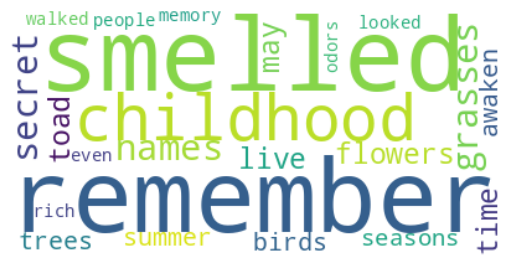

In [13]:
from wordcloud import WordCloud

## Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')
plt.axis('off')
# Display the figure
plt.show()

### Which words are in the word cloud?
Let's continue with the word cloud exercises. A string called illuminated has been defined for you. It contains an emotionally charged quote from the book 'Everything is Illuminated' by Jonathan Safran Foer. Generate and display a word cloud using the illuminated string. Note that all required packages have been imported for you.

Which of the following answers contains only words you see in the word cloud?

In [14]:
illuminated='I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad.'
illuminated

'I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad.'

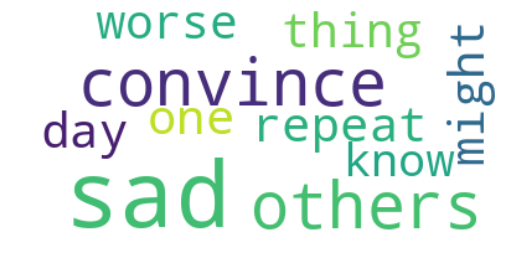

In [15]:
# generate word cloud
ill_word_cloud= WordCloud(background_color='white').generate(illuminated)
# create figure of generate cloud
plt.imshow(ill_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Word Cloud on movie reviews
You have been working with the movie reviews dataset. You have explored the distribution of the reviews and have seen how long the longest and the shortest reviews are. But what do positive and negative reviews talk about?

In this exercise, you will practice building a word cloud of the top 100 positive reviews.

What are the words that pop up? Do they make sense to you?

The string descriptions has been created for you by concatenating the descriptions of the top 100 positive reviews. A movie-specific set of stopwords (very frequent words, such as the, a/an, and, which will not be very informative and we'd like to exclude from the graph) is available as my_stopwords. Recall that the interpolation argument makes the word cloud appear more smoothly.

In [16]:
my_stopwords= {'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'film',
 'films',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 'movie',
 'movies',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r',
 'same',
 'shall',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "shouldn't",
 'since',
 'so',
 'some',
 'such',
 'than',
 'that',
 "that's",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 "there's",
 'therefore',
 'these',
 'they',
 "they'd",
 "they'll",
 "they're",
 "they've",
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 "wasn't",
 'watch',
 'we',
 "we'd",
 "we'll",
 "we're",
 "we've",
 'were',
 "weren't",
 'what',
 "what's",
 'when',
 "when's",
 'where',
 "where's",
 'which',
 'while',
 'who',
 "who's",
 'whom',
 'why',
 "why's",
 'with',
 "won't",
 'would',
 "wouldn't",
 'www',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

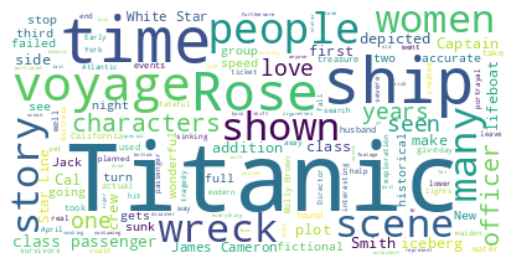

In [17]:
# Import the word cloud function
from wordcloud import WordCloud

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(titanic)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")

# Don't forget to show the final image
plt.show()

# CHAPTER 2 Numeric Features from Reviews

Imagine you are in the shoes of a company offering a variety of products. You want to know which of your products are bestsellers and most of all - why. We embark on step 1 of understanding the reviews of products, using a dataset with Amazon product reviews. To that end, we transform the text into a numeric form and consider a few complexities in the process.

## Bag-of-words
describes occurrence of words within document or collection (corpus)

builds vocab of words

### Which statement about BOW is true?
You were introduced to a bag-of-words(BOW) and some of its characteristics in the video. Which of the following statements about BOW is true?

Answer:
Bag-of-words is a simple but effective method to build a vocabulary of all the words occurring in a document.

### Your first BOW
A bag-of-words is an approach to transform text to numeric form.

In this exercise, you will apply a BOW to the annak list before moving on to a larger dataset in the next exercise.

Your task will be to work with this list and apply a BOW using the CountVectorizer(). This transformation is your first step in being able to understand the sentiment of a text. Pay attention to words which might carry a strong sentiment.

Remember that the output of a CountVectorizer() is a sparse matrix, which stores only entries which are non-zero. To look at the actual content of this matrix, we convert it to a dense array using the .toarray() method.

Note that in this case you don't need to specify the max_features argument because the text is short.

In [18]:
# Import the required function
from sklearn.feature_extraction.text import CountVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Build the vectorizer and fit it
anna_vect= CountVectorizer()
anna_vect.fit(annak)

# Create bow respresentation
anna_bow= anna_vect.transform(annak)

#print bag of words
print(anna_bow.toarray())

# output is not very readable, is it? We are still missing the names of the features.
#  And does the approach change when we apply it to a larger dataset?

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


### BOW using product reviews
You practiced a BOW on a small dataset. Now you will apply it to a sample of Amazon product reviews. The data has been imported for you and is called reviews. It contains two columns. The first one is called score and it is 0 when the review is negative, and 1 when it is positive. The second column is called review and it contains the text of the review that a customer wrote. Feel free to explore the data in the IPython Shell.

Your task is to build a BOW vocabulary, using the review column.

Remember that we can call the .get_feature_names() method on the vectorizer to obtain a list of all the vocabulary elements.

In [19]:
reviews= pd.read_csv('amazon_reviews_sample.csv')
reviews= reviews.drop(['Unnamed: 0'], axis=1)
reviews.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Build the vectorizer, specify max features
vect = CountVectorizer(max_features=100)
# Fit the vectorizer
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]


## Getting granular with n-grams

unigrams: single token

bigrams: pairs of token

trigrams: triple tokens

n-grams: sequence of n-tokens

Longer sequences of tokens: result in more features, higher precision of ML models, risk of overfitting. Try different lengths in GridSearch

### Specify token sequence length with BOW
We saw in the video that by specifying different length of tokens - what we called n-grams - we can better capture the context, which can be very important.

In this exercise, you will work with a sample of the Amazon product reviews. Your task is to build a BOW vocabulary, using the review column and specify the sequence length of tokens.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(ngram_range=(1,2))
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

# You have built a numeric representation of the review column using uni- and bigrams!

   00  00 and  00 apiece  00 as  00 back  00 bad  00 bucks  00 cheaper  00 do  \
0   0       0          0      0        0       0         0           0      0   
1   0       0          0      0        0       0         0           0      0   
2   0       0          0      0        0       0         0           0      0   
3   0       0          0      0        0       0         0           0      0   
4   0       0          0      0        0       0         0           0      0   

   00 does  ...  étai fidèle  était  était pas  étre  étre publié  éviter  \
0        0  ...            0      0          0     0            0       0   
1        0  ...            0      0          0     0            0       0   
2        0  ...            0      0          0     0            0       0   
3        0  ...            0      0          0     0            0       0   
4        0  ...            0      0          0     0            0       0   

   última  última parte  única  única opción  
0  

### Size of vocabulary of movies reviews
In this exercise, you will practice different ways to limit the size of the vocabulary using a sample of the movies reviews dataset. The first column is the review, which is of type object and the second column is the label, which is 0 for a negative review and 1 for a positive one.

The three methods that you will use will transform the text column to new numeric columns, capturing the count of a word or a phrase in each review. Each method will ultimately result in building a different number of new features.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Build the vectorizer, Using the movies dataset, limit the size of the vocabulary to 100.

vect = CountVectorizer(max_features=100)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   about  after  all  also  an  and  any  are  as  at  ...  well  were  what  \
0      0      0    0     0   0    1    0    0   2   0  ...     0     0     0   
1      0      0    3     1   1   11    0    3   3   4  ...     0     0     1   
2      0      1    0     0   1    7    0    1   2   1  ...     0     0     0   
3      0      0    0     0   2    1    0    1   2   2  ...     1     0     0   
4      0      0    3     0   0    8    0    3   1   0  ...     2     1     0   

   when  which  who  will  with  would  you  
0     0      0    0     0     1      1    0  
1     1      2    0     2     7      2    3  
2     0      0    0     0     2      0    0  
3     0      0    1     0     0      0    1  
4     1      1    0     0     2      0    0  

[5 rows x 100 columns]


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Build the vectorizer, limit the size of the vocab to include terms which occur in no more then 200 documents
vect = CountVectorizer(max_df=200)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   00  000  000s  007  0080  0083  0093638  00am  00pm  00s  ...  zukovic  \
0   0    0     0    0     0     0        0     0     0    0  ...        0   
1   0    0     0    0     0     0        0     0     0    0  ...        0   
2   0    0     0    0     0     0        0     0     0    0  ...        0   
3   0    0     0    0     0     0        0     0     0    0  ...        0   
4   0    0     0    0     0     0        0     0     0    0  ...        0   

   zulu  zuniga  zvyagvatsev  zwick  zx81  zy  zzzzzzzzzzzz  zzzzzzzzzzzzz  â½  
0     0       0            0      0     0   0             0              0   0  
1     0       0            0      0     0   0             0              0   0  
2     0       0            0      0     0   0             0              0   0  
3     0       0            0      0     0   0             0              0   0  
4     0       0            0      0     0   0             0              0   0  

[5 rows x 45055 columns]


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Build the vectorizer, limit the size of the vocabulary to ignore terms which occur in less than 50 documents.
vect = CountVectorizer(min_df=50)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   000  10  100  11  12  13  14  15  1950  1980  ...  york  you  young  \
0    0   0    0   0   0   0   0   0     0     0  ...     0    0      0   
1    0   1    0   0   0   0   0   0     0     0  ...     0    3      0   
2    0   0    0   0   0   0   0   0     0     0  ...     0    0      1   
3    0   0    0   0   0   0   0   0     0     0  ...     0    1      1   
4    0   1    0   0   0   0   0   0     0     0  ...     0    0      0   

   younger  your  yourself  youth  zero  zombie  zombies  
0        0     0         0      0     0       0        1  
1        0     2         0      0     0       0        0  
2        0     0         0      0     0       0        0  
3        0     0         0      0     0       0        0  
4        1     0         0      0     0       0        0  

[5 rows x 2552 columns]


### BOW with n-grams and vocabulary size
In this exercise, you will practice building a bag-of-words once more, using the reviews dataset of Amazon product reviews. Your main task will be to limit the size of the vocabulary and specify the length of the token sequence.

In [25]:
#Import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Build the vectorizer, specify the size of the vocabulary should be limited to 1000, include only bigrams,
# and ignore terms that appear in more than 500 documents.
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(reviews.review)

# Transform the review
X_review = vect.transform(reviews.review)


# Create a DataFrame from the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   able to  about how  about it  about the  about this  after reading  \
0        0          0         0          0           0              0   
1        0          0         0          0           0              0   
2        0          0         0          0           0              0   
3        0          0         0          0           0              0   
4        0          0         0          0           0              0   

   after the  again and  ago and  agree with  ...  you think  you to  you ve  \
0          0          0        0           0  ...          0       0       0   
1          0          0        0           0  ...          0       0       0   
2          0          0        0           0  ...          0       0       2   
3          0          0        0           0  ...          0       0       0   
4          0          0        0           0  ...          0       0       1   

   you want  you will  you won  you would  your money  your own  your time  
0  

## Build new features from text

Tokenizing a string

### Tokenize a string from GoT
A first standard step when working with text is to tokenize it, in other words, split a bigger string into individual strings, which are usually single words (tokens).

A string GoT has been created for you and it contains a quote from George R.R. Martin's Game of Thrones. Your task is to split it into individual tokens.



In [26]:
GoT= 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'
print(GoT)

Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.


In [27]:
# Import the required function
from nltk import word_tokenize
import nltk
nltk.download('punkt')


# Transform the GoT string to word tokens
print(word_tokenize(GoT))

# taken a string and split it up into word tokens.

['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Word tokens from the Avengers
Now that you have tokenized your first string, it is time to iterate over items of a list and tokenize them as well. An easy way to do that with one line of code is with a list comprehension.

A list avengers has been created for you. It contains a few quotes from the Avengers movies. You can explore it in the IPython Shell.

In [28]:
avengers= ["Cause if we can't protect the Earth, you can be d*** sure we'll avenge it",
 'There was an idea to bring together a group of remarkable people, to see if we could become something more',
 "These guys come from legend, Captain. They're basically Gods."]
avengers

["Cause if we can't protect the Earth, you can be d*** sure we'll avenge it",
 'There was an idea to bring together a group of remarkable people, to see if we could become something more',
 "These guys come from legend, Captain. They're basically Gods."]

In [29]:
# Import the word tokenizing function
from nltk import word_tokenize

# Tokenize each item in the avengers
tokens_avengers = [word_tokenize(item) for item in avengers]

print(tokens_avengers)

[['Cause', 'if', 'we', 'ca', "n't", 'protect', 'the', 'Earth', ',', 'you', 'can', 'be', 'd', '*', '*', '*', 'sure', 'we', "'ll", 'avenge', 'it'], ['There', 'was', 'an', 'idea', 'to', 'bring', 'together', 'a', 'group', 'of', 'remarkable', 'people', ',', 'to', 'see', 'if', 'we', 'could', 'become', 'something', 'more'], ['These', 'guys', 'come', 'from', 'legend', ',', 'Captain', '.', 'They', "'re", 'basically', 'Gods', '.']]


### A feature for the length of a review
You have now worked with a string and a list with string items, it is time to use a larger sample of data.

Your task in this exercise is to create a new feature for the length of a review, using the familiar reviews dataset.

In [30]:
# Import the needed packages
from nltk import word_tokenize

# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]

# Print out the first item of the word_tokens list
print(word_tokens[0])

['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


In [31]:
# Create an empty list to store the length of reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens

reviews

,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109
...,...,...,...
9995,1,A revelation of life in small town America in...,175
9996,1,Great biography of a very interesting journal...,153
9997,0,Interesting Subject; Poor Presentation: You'd...,122
9998,0,Don't buy: The box looked used and it is obvi...,33


## Can you guess the language

from langdetect import detect_langs

### Identify the language of a string
Sometimes you might need to analyze the sentiment of non-English text. Your first task in such a case will be to identify the foreign language.

In this exercise you will identify the language of a single string. A string called foreign has been created for you. It has been randomly extracted from the reviews dataset and may contain some grammatical errors. Feel free to explore it in the IPython Shell.

In [32]:
foreign= "L'histoire rendu était fidèle, excellent, et grande."
foreign

"L'histoire rendu était fidèle, excellent, et grande."

In [33]:
!pip install langdetect
# Import the language detection function and package
from langdetect import detect_langs

# Detect the language of the foreign string
print(detect_langs(foreign))

# predicted French

[fr:0.9999961747075667]


### Detect language of a list of strings
Now you will detect the language of each item in a list. A list called sentences has been created for you and it contains 3 sentences, each in a different language. They have been randomly extracted from the product reviews dataset.

In [34]:
sentences= ["L'histoire rendu était fidèle, excellent, et grande.",
 'Excelente muy recomendable.',
 'It had a leak from day one but the return and exchange process was very quick.']
sentences

["L'histoire rendu était fidèle, excellent, et grande.",
 'Excelente muy recomendable.',
 'It had a leak from day one but the return and exchange process was very quick.']

In [35]:
from langdetect import detect_langs

languages = []

# Loop over the sentences in the list and detect their language
for sentence in sentences:
    languages.append(detect_langs(sentence))

print('The detected languages are: ', languages)

The detected languages are:  [[fr:0.99999859127508], [es:0.9999961402768263], [en:0.9999993535542243]]


### Language detection of product reviews
You will practice language detection on a small dataset called non_english_reviews. It is a sample of non-English reviews from the Amazon product reviews.

You will iterate over the rows of the dataset, detecting the language of each row and appending it to an empty list. The list needs to be cleaned so that it only contains the language of the review such as 'en' for English instead of the regular output en:0.9987654. Remember that the language detection function might detect more than one language and the first item in the returned list is the most likely candidate. Finally, you will assign the list to a new column.

The logic is the same as used in the slides and the exercise before but instead of applying the function to a list, you work with a dataset.

In [36]:
non_english_reviews= reviews.loc[[1240, 1259, 1260, 1261, 1639, 1745, 2316, 2486, 2760, 2903, 2908, 3318, 3694]]
non_english_reviews

,score,review,n_words
1240,1,Playdough fun!: This was purchased as a Holid...,142
1259,1,La reencarnación vista por un científico: El ...,37
1260,1,Excelente Libro / Amazing book!!: Este libro ...,114
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,50
1639,1,El libro mas completo que existe para nosotra...,40
1745,1,Excelente!: Una excelente guía para todos aqu...,56
2316,1,Nightwish is unique and rocks for eva: Moi to...,54
2486,1,Palabras de aliento para tu caminar con Dios:...,86
2760,0,Completement nul: Fait sur commande et ennuya...,23
2903,1,fabuloso: mil gracias por el producto fabulos...,23


In [37]:
from langdetect import detect_langs

# create empty list
languages= []

# loop over rows of dataset and append. Inside loop, detect the language of the 2nd column of dataset
for row in range(len(non_english_reviews)):
    languages.append(detect_langs(non_english_reviews.iloc[row, 1]))


# Clean the string by splitting on a : inside the list comprehension expression.
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature
non_english_reviews['language'] = languages

print(non_english_reviews.head())

      score                                             review  n_words  \
1240      1   Playdough fun!: This was purchased as a Holid...      142   
1259      1   La reencarnación vista por un científico: El ...       37   
1260      1   Excelente Libro / Amazing book!!: Este libro ...      114   
1261      1   Magnifico libro: Brian Weiss ha dejado una ma...       50   
1639      1   El libro mas completo que existe para nosotra...       40   

     language  
1240       en  
1259       es  
1260       es  
1261       es  
1639       es  


# CHAPTER 3 More on Numeric Vectors: Transforming Tweets

This chapter continues the process of understanding product reviews. We will cover additional complexities, especially when working with sentiment analysis data from social media platforms such as 0Twitter. We will also learn other ways to obtain numeric features from the text.

## Stop Words

words that occur too frequently and not consider informative

from wordcloud import STOPWORDS

BOW: from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

### Word cloud of tweets
Your task in this exercise is to plot a word cloud using a sample of Twitter data, expressing customers' sentiments about airlines. A string text_tweet has been created for you and it contains the messages of a 1000 customers shared on Twitter.

In the first step, your are asked to build the word cloud without removing the stop words, and in the second step to build the same cloud after you have removed the stop words.

Feel free to familiarize yourself with the text_tweet list.

In [38]:
tweets= pd.read_csv('Tweets.csv')
text_tweet= tweets.text[111]
text_tweet

'@VirginAmerica has getaway deals through May, from $59 one-way. Lots of cool cities http://t.co/B2Xi4YG5T8 #CheapFlights #FareCompare'

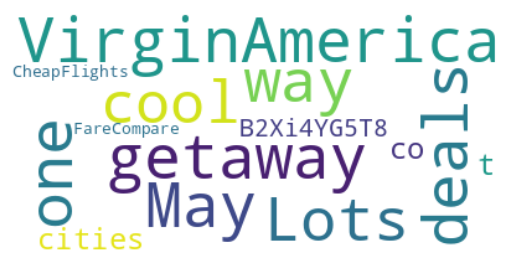

In [39]:
# Import the word cloud function
from wordcloud import WordCloud

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")

# Don't forget to show the final image
plt.show()

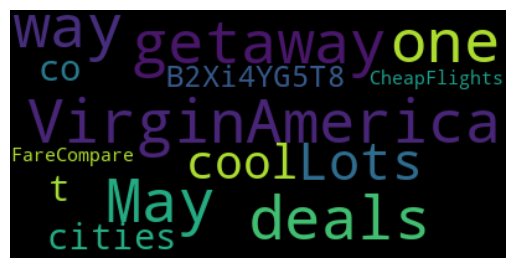

In [40]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS

# Define and update the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")
# Don't forget to show the final image
plt.show()

### Airline sentiment with stop words
You are given a dataset, called tweets, which contains customers' reviews and sentiments about airlines. It consists of two columns: airline_sentiment and text where the sentiment can be positive, negative or neutral, and the text is the text of the tweet.

In this exercise, you will create a BOW representation but will account for the stop words. Remember that stop words are not informative and you might want to remove them. That will result in a smaller vocabulary and eventually, fewer features. Keep in mind that we can enrich a default list of stop words with ones that are specific to our context.

In [41]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [42]:
# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
print(type(ENGLISH_STOP_WORDS))
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])
my_stop_words= list(my_stop_words)

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

#Did you notice that in this case the created features contain digits and other characters?
#Social media data can in general be quite messy and in a later video we will learn how to remove all digits and other characters
# and retain only more meaningful features

<class 'frozenset'>
   00  000  000114  000419  000ft  000lbs  0011  0016  00a  00am  ...  \
0   0    0       0       0      0       0     0     0    0     0  ...   
1   0    0       0       0      0       0     0     0    0     0  ...   
2   0    0       0       0      0       0     0     0    0     0  ...   
3   0    0       0       0      0       0     0     0    0     0  ...   
4   0    0       0       0      0       0     0     0    0     0  ...   

   zrh_airport  zsdgzydnde  zsuztnaijq  ztrdwv0n4l  zukes  zurich  zv2pt6trk9  \
0            0           0           0           0      0       0           0   
1            0           0           0           0      0       0           0   
2            0           0           0           0      0       0           0   
3            0           0           0           0      0       0           0   
4            0           0           0           0      0       0           0   

   zv6cfpohl5  zvfmxnuelj  zzps5ywve2  
0           0 

### Multiple text columns
In this exercise, you will continue working with the airline Twitter data. A dataset tweets has been imported for you.

In some situations, you might have more than one text column in a dataset and you might want to create a numeric representation for each of the text columns. Here, besides the text column, which contains the body of the tweet, there is a second text column, called negativereason. It contains the reason the customer left a negative review.

Your task is to build BOW representations for both columns and specify the required stop words.

In [43]:
# Import the vectorizer and default English stop words list
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
my_stop_words= list(my_stop_words)
ENGLISH_STOP_WORDS= list(ENGLISH_STOP_WORDS)

#doing this cause data is messed up
tweets['negativereason_gold'].fillna(method='ffill', inplace=True)
negativereason_gold_list = tweets['negativereason_gold'].dropna().tolist()


# Specify the stop words argument in the first vectorizer to the updated set, and in the second vectorizer - the default set of English stop words.
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
vect1.fit(tweets.text)
vect2.fit(negativereason_gold_list)

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names_out()[-15:])
print(vect2.get_feature_names_out())

#we can transform each of them to numeric features separately, using different arguments in the CountVectorizer() function.

['zoom' 'zouowgv3q6' 'zpz78poeon' 'zqutus7epw' 'zrh' 'zrh_airport'
 'zsdgzydnde' 'zsuztnaijq' 'ztrdwv0n4l' 'zukes' 'zurich' 'zv2pt6trk9'
 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']
['attendant' 'bad' 'cancelled' 'complaints' 'customer' 'damaged' 'flight'
 'issue' 'late' 'lost' 'luggage' 'service' 'tell']


In [44]:
tweets.negativereason_gold.value_counts()

Cancelled Flight                            3069
Late Flight                                 2783
Customer Service Issue\nCan't Tell          2601
Customer Service Issue                      1384
Cancelled Flight\nCustomer Service Issue    1159
Late Flight\nFlight Attendant Complaints     731
Bad Flight                                   720
Can't Tell                                   516
Lost Luggage\nDamaged Luggage                203
Late Flight\nLost Luggage                    184
Flight Attendant Complaints                    2
Late Flight\nCancelled Flight                  1
Customer Service Issue\nLost Luggage           1
Name: negativereason_gold, dtype: int64

## Capturing a token pattern

### Specify the token pattern
In this exercise, you will work with the text column of the tweets dataset. Your task is to vectorize the object column using CountVectorizer. You will apply different patterns of tokens in the vectorizer. Remember that by specifying the token pattern, you can filter out characters.

The CountVectorizer has been imported for you.

In [45]:
# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweets.text)
vect.transform(tweets.text)
print('Length of vectorizer: ', len(vect.get_feature_names_out()))

Length of vectorizer:  11893


In [46]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names_out()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names_out()))

# Did you notice how fewer features were created when we specified the token pattern?
# It is a nice way to limit the size of our vocabulary and make sure we only include certain tokens when we create it.

Length of vectorizer 1:  15051
Length of vectorizer 2:  643


### String operators with the Twitter data
You continue working with the tweets data where the text column stores the content of each tweet.

Your task is to turn the text column into a list of tokens. Then, using string operators, remove all non-alphabetic characters from the created list of tokens.

In [47]:
# Import the word tokenizing package
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])
# Did you notice how the list of word tokens changes before and after the filtering out of non-alphabetic characters?

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


### More string operators and Twitter
In this exercise, you will apply different string operators to three strings, selected from the tweets dataset. A tweets_list has been created for you.

You need to construct three new lists by applying different string operators:

a list retaining only letters

a list retaining only characters

a list retaining only digits

The required functions have been imported for you from nltk.

In [48]:
tweets_list= ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
 '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

In [49]:
# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

# know apply string operators to modify strings or lists of strings. You can apply these skills when constructing features from text.

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


## Stemming and lemmatization

Stemming: house, houses, housing --> hous

Lemmatization: house, houses, housing --> house

### Stems and lemmas from GoT
In this exercise, you are given a couple of sentences from George R.R. Martin's Game of Thrones. Your task is to create stems and lemmas from the given GoT string.

Remember that stems reduce a word to its root whereas lemmas produce an actual word. However, speed can differ significantly between the methods with stemming being much faster. In Steps 2 and 3, pay attention to the total time it takes to perform each operation. We're making use of the time.time() method to measure the time it takes to perform stemming and lemmatization.

In [50]:
print(GoT)

Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.


In [51]:
# Import the required packages from nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

# Tokenize the GoT string
tokens = word_tokenize(GoT)

In [52]:
import time

# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens)

Time taken for stemming in seconds:  0.0008406639099121094
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


In [53]:
import time
import nltk

nltk.download('wordnet')

# Log the start time
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Time taken for lemmatizing in seconds:  1.7844727039337158
Lemmatized tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


### Stem Spanish reviews
You will recall that in a previous chapter we used a language detection package to determine the language of different Amazon product reviews. In this exercise, you will first detect the languages in the non_english_reviews. The reviews are in multiple languages but you will select ONLY those in Spanish. Feel free to go back to the video discussing foreign language detection if you have forgotten some of the concepts.

In the second step, you will create word tokens from the Spanish reviews and will stem them using a SnowBall stemmer for the Spanish language. The language detection package is not perfect, unfortunately. Therefore, it is possible that sometimes the detected language is not correct.

In [54]:
non_english_reviews

,score,review,n_words,language
1240,1,Playdough fun!: This was purchased as a Holid...,142,en
1259,1,La reencarnación vista por un científico: El ...,37,es
1260,1,Excelente Libro / Amazing book!!: Este libro ...,114,es
1261,1,Magnifico libro: Brian Weiss ha dejado una ma...,50,es
1639,1,El libro mas completo que existe para nosotra...,40,es
1745,1,Excelente!: Una excelente guía para todos aqu...,56,es
2316,1,Nightwish is unique and rocks for eva: Moi to...,54,fr
2486,1,Palabras de aliento para tu caminar con Dios:...,86,es
2760,0,Completement nul: Fait sur commande et ennuya...,23,fr
2903,1,fabuloso: mil gracias por el producto fabulos...,23,es


In [55]:
# Import the language detection package
import langdetect

# Loop over the rows of the dataset and append
languages = []
for i in range(len(non_english_reviews)):
    languages.append(langdetect.detect_langs(non_english_reviews.iloc[i, 1]))

# Clean the list by splitting
languages = [str(lang).split(':')[0][1:] for lang in languages]
# Assign the list to a new feature
non_english_reviews['language'] = languages

# Select the Spanish ones
filtered_reviews = non_english_reviews[non_english_reviews.language == 'es']

In [56]:
# Import the required packages
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

# Import the Spanish SnowballStemmer
SpanishStemmer = SnowballStemmer("spanish")

# Create a list of tokens
tokens = [word_tokenize(review) for review in filtered_reviews.review]
# Stem the list of tokens
stemmed_tokens = [[SpanishStemmer.stem(word) for word in token] for token in tokens]

# Print the first item of the stemmed tokenss
print(stemmed_tokens[0])

['la', 'reencarn', 'vist', 'por', 'un', 'cientif', ':', 'el', 'prim', 'libr', 'del', 'dr.', 'weiss', 'sig', 'siend', 'un', 'gran', 'libr', 'par', 'tod', 'aquell', 'a', 'quien', 'les', 'inquiet', 'el', 'tem', 'de', 'la', 'reencarn', ',', 'asi', 'no', 'cre', 'en', 'ella', '.']


### Stems from tweets
In this exercise, you will work with an array called tweets. It contains the text of the airline sentiment data collected from Twitter.

Your task is to work with this array and transform it into a list of tokens using list comprehension. After that, iterate over the list of tokens and create a stem out of each token. Remember that list comprehensions are a one-line alternative to for loops

In [57]:
# Import the function to perform stemming
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(x) for x in tweets.text.loc[0:4]]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens]
# Print the first element of the list
print(stemmed_tokens[0])

['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']


## TfIdf: More ways to transform text

### Your first TfIdf
In this exercise, you will apply the TfIdf method to the small annak dataset, containing the first sentence of Anna Karenina by Leo Tolstoy.

Your task will be to work with this dataset and apply the TfidfVectorizer() function. Recall that performing a numeric transformation of text is your first step in being able to understand the sentiment of the text. The Tfidf vectorizer is another way to construct a vocabulary from our sentiment column.

In [58]:
# Import the required function
from sklearn.feature_extraction.text import TfidfVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Call the vectorizer and fit it
anna_vect = TfidfVectorizer().fit(annak)

# Create the tfidf representation
anna_tfidf = anna_vect.transform(annak)

# Print the result
print(anna_tfidf.toarray())

# Do you recall building a bag-of-words representation for the same data earlier? What differences do you notice?

[[0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.30151134 0.         0.30151134
  0.         0.30151134 0.30151134 0.30151134 0.30151134 0.60302269
  0.30151134]]


### TfIdf on Twitter airline sentiment data
You will now build features using the TfIdf method. You will continue to work with the tweets dataset.

In this exercise, you will utilize what you have learned in previous lessons and remove stop words, use a token pattern and specify the n-grams.

The final output will be a DataFrame, of which the columns are created using the TfidfVectorizer(). Such a DataFrame can directly be passed to a supervised learning model, which is what we will tackle in the next chapter.

In [59]:
# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build a TfIdf vectorizer from the text column of the tweets dataset, specifying uni- and bi-grams as a choice of n-grams
# tokens which include only alphanumeric characters using the given token pattern
# stop words corresponding to English stop words
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=list(ENGLISH_STOP_WORDS)).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names_out())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:      aa  agent  airline  airport  americanair       amp  bag  baggage  bags  \
0  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
1  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
2  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
3  0.0    0.0      0.0      0.0          0.0  0.537247  0.0      0.0   0.0   
4  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   

   cancelled  ...        ve  virginamerica  wait  waiting  want  way  weather  \
0        0.0  ...  0.000000       1.000000   0.0      0.0   0.0  0.0      0.0   
1        0.0  ...  0.544485       0.531770   0.0      0.0   0.0  0.0      0.0   
2        0.0  ...  0.000000       0.407271   0.0      0.0   0.0  0.0      0.0   
3        0.0  ...  0.000000       0.559828   0.0      0.0   0.0  0.0      0.0   
4        0.0  ...  0.000000       0.663756   0.0      0.0   0.0  0.0      0.0   

   work  worst

### Tfidf and a BOW on same data
In this exercise, you will transform the review column of the Amazon product reviews using both a bag-of-words and a tfidf transformation.

Build both vectorizers, specifying only the maximum number of features to be equal to 100. Create DataFrames after the transformation and print the top 5 rows of each.

Be careful how you specify the maximum number of features in the vocabulary. A large vocabulary size can result in your session being disconnected.

In [60]:
# Import the required packages
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review)

# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)
# Create DataFrames from the vectorizers
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names_out())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names_out())
print('Top 5 rows using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

# Which approach should you select? That usually depends on the context and on how well they perform when used with a machine learning model.

Top 5 rows using BOW: 
    about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]
Top 5 rows using tfidf: 
    about     after       all  also   am       an       and       any  \
0    0.0  0.000000  0.138970   0.0  0.0  0.00000  0.140823  0.000000   
1    0.0  0.000000  0.000

# CHATPER 4 Lets Predict the Sentiment

We employ machine learning to predict the sentiment of a review based on the words used in the review. We use logistic regression and evaluate its performance in a few different ways. These are some solid first models!

## Let's predict the sentiment!

### Logistic regression of movie reviews
In the video we learned that logistic regression is a common way to model a classification task, such as classifying the sentiment as positive or negative.

In this exercise, you will work with the movies reviews dataset. The label column stores the sentiment, which is 1 when the review is positive, and 0 when negative. The text review has been transformed, using BOW, to numeric columns.

Your task is to build a logistic regression model using the movies dataset and calculate its accuracy.

In [61]:
movies

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0
...,...,...,...
7496,7334,Although this film is somewhat filled with eig...,1
7497,11638,Bo Derek's beauty and John Derek's revolutiona...,1
7498,19851,I have seen every episode of this spin off. I ...,0
7499,8114,"A comedy gem. Lots of laugh out loud moments, ...",1


In [65]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Import the necessary libraries and load the dataset
# Assuming you have a DataFrame called 'movie_reviews' with 'text' and 'label' columns
# movie_reviews = pd.read_csv('your_dataset.csv')

# Step 2: Separate the 'text' and 'label' columns
reviews_text = movies['review']
labels = movies['label']

# Step 3: Create and fit the CountVectorizer to transform text into BoW representation
vectorizer = CountVectorizer()
bow_representation = vectorizer.fit_transform(reviews_text)

# Step 4: Convert the BoW representation to a pandas DataFrame
bow_df = pd.DataFrame(bow_representation.toarray(), columns=vectorizer.get_feature_names_out())

# Step 5: Combine the 'label' column with the BoW DataFrame
result_dataset = pd.concat([labels, bow_df], axis=1)


In [63]:
# # Import the logistic regression
from sklearn.linear_model import LogisticRegression

# # Define the vector of targets and matrix of features
y = result_dataset.label
X = result_dataset.drop('label', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

### Logistic regression using Twitter data
In this exercise, you will build a logistic regression model using the tweets dataset. The target is given by the airline_sentiment, which is 0 for negative tweets, 1 for neutral, and 2 for positive ones. So, in this case, you are given a multi-class classification task. Everything we learned about binary problems applies to multi-class classification problems as well.

You will evaluate the accuracy of the model using the two different approaches from the slides.

The logistic regression function and accuracy score have been imported for you.

In [91]:
# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build a TfIdf vectorizer from the text column of the tweets dataset, specifying uni- and bi-grams as a choice of n-grams
# tokens which include only alphanumeric characters using the given token pattern
# stop words corresponding to English stop words
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=list(ENGLISH_STOP_WORDS)).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names_out())


labels= tweets[['airline_sentiment', 'airline_sentiment_confidence',  'retweet_count']]
# Step 5: Combine the 'label' column with the BoW DataFrame
result_dataset = pd.concat([labels, X], axis=1)

# Create a mapping dictionary for sentiment conversion
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

# Use the map function to convert the 'airline_sentiment' column
result_dataset['airline_sentiment'] = result_dataset['airline_sentiment'].map(sentiment_mapping)
result_dataset.head(2)

,airline_sentiment,airline_sentiment_confidence,retweet_count,aa,agent,airline,airport,americanair,amp,bag,...,ve,virginamerica,wait,waiting,want,way,weather,work,worst,yes
0,1,1.0000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.3486,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.544485,0.53177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Define the vector of targets and matrix of features
y_tweets = result_dataset.airline_sentiment
X_tweets = result_dataset.drop('airline_sentiment', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X_tweets, y_tweets)
print('Accuracy of logistic regression: ', log_reg.score(X_tweets,y_tweets))

# Create an array of prediction
y_predict = log_reg.predict(X_tweets)

# Print the accuracy using accuracy score
print('Accuracy of logistic regression: ', accuracy_score(y_tweets, y_predict))

Accuracy of logistic regression:  0.7275956284153006
Accuracy of logistic regression:  0.7275956284153006


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Did we really predict the sentiment well?

stratify: proportion of classes in sample produced will be same as proportion of values provided to this parameter

### Build and assess a model: movies reviews
In this problem, you will build a logistic regression model using the movies dataset. The score is stored in the label column and is 1 when the review is positive, and 0 when negative. The text review has been transformed, using BOW, to numeric columns.

You have already built a classifier but evaluated it using the same data employed in the training step. Make sure you now assess the model using an unseen test dataset. How does the performance of the model change when evaluated on the test set?

In [ ]:
# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the vector of labels and matrix of features
y = movies.label
X = movies.drop('label', axis=1)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

### Performance metrics of Twitter data
You will train a logistic regression model that predicts the sentiment of tweets and evaluate its performance on the test set using different metrics.

A matrix X has been created for you. It contains features created with a BOW on the text column.

The labels are stored in a vector called y. Vector y is 0 for negative tweets, 1 for neutral, and 2 for positive ones.
Note that although we have 3 classes, it is still a classification problem. The accuracy still measures the proportion of correctly predicted instances. The confusion matrix will now be of size 3x3, each row will give the number of predicted cases for classes 2, 1, and 0, and each column - the true number of cases in class 2, 1, and 0.

All required packages have been imported for you.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Make predictions on the test set
y_predicted = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

#The accuracy on the test data was good and the confusion matrix can also show us which category we are bad at predicting.

Accuracy score test set:  0.7215391621129326
Confusion matrix test set: 
 [[0.55692168 0.05145719 0.01844262]
 [0.10997268 0.08401639 0.01775956]
 [0.05532787 0.02550091 0.08060109]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Build and assess a model: product reviews data
In this exercise, you will build a logistic regression using the reviews dataset, containing customers' reviews of Amazon products. The array y contains the sentiment : 1 if positive and 0 otherwise. The array X contains all numeric features created using a BOW approach. Feel free to explore them in the IPython Shell.

Your task is to build a logistic regression model and calculate the accuracy and confusion matrix using the test dataset.

The logistic regression and train/test splitting functions have been imported for you.

In [89]:
# Build a TfIdf vectorizer from the text column of the tweets dataset, specifying uni- and bi-grams as a choice of n-grams
# tokens which include only alphanumeric characters using the given token pattern
# stop words corresponding to English stop words
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=list(ENGLISH_STOP_WORDS)).fit(reviews.review)

# Transform the vectorizer
X_txt = vect.transform(reviews.review)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names_out())

score= reviews.score

new_Data= pd.concat([score, X], axis=1)
print(new_Data.head())
X_reviews= new_Data.drop('score', axis=1)
y_reviews= new_Data.score

   score  album  amazon  author  bad      best  better  big  book  books  ...  \
0      1    0.0     0.0     0.0  0.0  0.248439     0.0  0.0   0.0    0.0  ...   
1      1    0.0     0.0     0.0  0.0  0.432457     0.0  0.0   0.0    0.0  ...   
2      1    0.0     0.0     0.0  0.0  0.176268     0.0  0.0   0.0    0.0  ...   
3      1    0.0     0.0     0.0  0.0  0.146884     0.0  0.0   0.0    0.0  ...   
4      1    0.0     0.0     0.0  0.0  0.222336     0.0  0.0   0.0    0.0  ...   

   watch  way      work  works  world  worst     worth  written  year  \
0    0.0  0.0  0.000000    0.0    0.0    0.0  0.000000      0.0   0.0   
1    0.0  0.0  0.000000    0.0    0.0    0.0  0.251502      0.0   0.0   
2    0.0  0.0  0.183054    0.0    0.0    0.0  0.205022      0.0   0.0   
3    0.0  0.0  0.000000    0.0    0.0    0.0  0.000000      0.0   0.0   
4    0.0  0.0  0.000000    0.0    0.0    0.0  0.000000      0.0   0.0   

      years  
0  0.000000  
1  0.239439  
2  0.195189  
3  0.000000  
4  0

In [82]:
# Import the accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the labels
y_predict = log_reg.predict(X_test)

# Print the performance metrics
print('Accuracy score of test data: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of test data: \n', confusion_matrix(y_test, y_predict)/len(y_test))

Accuracy score of test data:  0.753
Confusion matrix of test data: 
 [[0.381 0.125]
 [0.122 0.372]]


## Logistic regression: revisited

Regularization: way to simplify model

### Predict probabilities of movie reviews
In this problem, you will build a logistic regression using the movies dataset. The labels are stored in the arrayy and the features in X.

Train the model on the training data. Instead of predicting classes, predict the probabilities that each instance in the test set belongs to each of the two classes.

The logistic regression and train/test splitting functions have been imported for you.

In [87]:
# Build a TfIdf vectorizer from the text column of the tweets dataset, specifying uni- and bi-grams as a choice of n-grams
# tokens which include only alphanumeric characters using the given token pattern
# stop words corresponding to English stop words
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=list(ENGLISH_STOP_WORDS)).fit(movies.review)

# Transform the vectorizer
X_txt = vect.transform(movies.review)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names_out())

label= movies.label

movie_data= pd.concat([label, X], axis=1)
print(movie_data.head())
X= movie_data.drop('label', axis=1)
y= movie_data.label

   label    acting    action    actors  actually  bad      best    better  \
0      0  0.000000  0.000000  0.000000       0.0  0.0  0.000000  0.268603   
1      0  0.081938  0.000000  0.095349       0.0  0.0  0.000000  0.086131   
2      1  0.000000  0.000000  0.000000       0.0  0.0  0.366731  0.000000   
3      1  0.000000  0.255363  0.000000       0.0  0.0  0.000000  0.000000   
4      0  0.000000  0.164115  0.000000       0.0  0.0  0.000000  0.000000   

        big  bit  ...   tv   ve  want  watch  watching       way      work  \
0  0.000000  0.0  ...  0.0  0.0   0.0    0.0       0.0  0.246126  0.000000   
1  0.102887  0.0  ...  0.0  0.0   0.0    0.0       0.0  0.000000  0.000000   
2  0.000000  0.0  ...  0.0  0.0   0.0    0.0       0.0  0.000000  0.000000   
3  0.480684  0.0  ...  0.0  0.0   0.0    0.0       0.0  0.000000  0.000000   
4  0.000000  0.0  ...  0.0  0.0   0.0    0.0       0.0  0.000000  0.144843   

   world  years     young  
0    0.0    0.0  0.000000  
1    0.0    

In [88]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]

print("First 10 predicted probabilities of class 0: ", prob_0[:10])
print("First 10 predicted probabilities of class 1: ", prob_1[:10])

First 10 predicted probabilities of class 0:  [0.79072828 0.89287408 0.6305212  0.1634492  0.5454923  0.93068963
 0.44151138 0.69252177 0.72988632 0.74203589]
First 10 predicted probabilities of class 1:  [0.20927172 0.10712592 0.3694788  0.8365508  0.4545077  0.06931037
 0.55848862 0.30747823 0.27011368 0.25796411]


### Product reviews with regularization
In this exercise, you will work once more with the reviews dataset of Amazon product reviews. A vector of labels y contains the sentiment : 1 if positive and 0 otherwise. The matrix X contains all numeric features created using a BOW approach.

You will need to train two logistic regression models with different levels of regularization and compare how they perform on the test data. Remember that regularization is a way to control the complexity of the model. The more regularized a model is, the less flexible it is but the better it can generalize. Models with higher level of regularization are often less accurate than non-regularized ones.

In [95]:

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_reviews, y_reviews, test_size=0.2, random_state=123)

# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

#Did you notice how the model with higher degree of penalization(low C) has lower accuracy than the one with very little penalization(high C)?
# We often sacrifice some accuracy when we regularize a model but the benefit is lower complexity and lower chance of overfitting.

Accuracy of model 1:  0.747
Accuracy of model 2:  0.6465


### Regularizing models with Twitter data
You will work with the Twitter data expressing customers' sentiment about airline companies. The X matrix of features and y vector of labels have been created for you. In addition, the training and testing split has been performed. You can work with the X_train, X_test, y_train and y_test arrays directly.

You will train regularized and a more flexible models and evaluate them using different model performance metrics.

All required packages have been imported for you.

In [96]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_tweets, y_tweets, test_size=0.2, random_state=123)

# Build a logistic regression with regularizarion parameter of 100
log_reg1 = LogisticRegression(C=100).fit(X_train, y_train)
# Build a logistic regression with regularizarion parameter of 0.1
log_reg2 = LogisticRegression(C=.1).fit(X_train, y_train)

# Predict the labels for each model
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)

# Print performance metrics for each model
print('Accuracy of model 1: ', accuracy_score(y_test, y_predict1))
print('Accuracy of model 2: ', accuracy_score(y_test, y_predict2))
print('Confusion matrix of model 1: \n' , confusion_matrix(y_test, y_predict1)/len(y_test))
print('Confusion matrix of model 2: \n', confusion_matrix(y_test, y_predict2)/len(y_test))

# You have trained a more and less flexible logistic regressions to predict the sentiment of tweets and evaluated them using different performance metrics.
# In this case, we again sacrificed some accuracy when we imposed regularizarion.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of model 1:  0.7366803278688525
Accuracy of model 2:  0.7305327868852459
Confusion matrix of model 1: 
 [[0.5659153  0.0420082  0.02015027]
 [0.1147541  0.08845628 0.01468579]
 [0.04644809 0.02527322 0.08230874]]
Confusion matrix of model 2: 
 [[0.58025956 0.03142077 0.01639344]
 [0.1318306  0.07308743 0.01297814]
 [0.05806011 0.01878415 0.07718579]]


## Bringing it all together



### Step 1: Word cloud and feature creation
You will work with a sample of the reviews dataset throughout this exercise. It contains the review and score columns. Feel free to explore it in the IPython Shell.

In the first step, you will build a word cloud using only positive reviews. The string positive_reviews has been created for you by concatenating the top 100 positive reviews.

In the second step, you will create a new feature for the length of each review and add that new feature to the dataset.

All the functions needed to plot a word cloud have been imported for you, as well as the word_tokenize function from the nltk module.

In [97]:
# Step 1: Filter the 'reviews' DataFrame to include only positive reviews (score = 1)
positive_reviews_df = reviews[reviews['score'] == 1]

# Step 2: Select the 'review' column from the filtered DataFrame
positive_reviews = positive_reviews_df['review']

# Step 3: Concatenate the top 100 positive reviews into a single string
positive_reviews = ' '.join(positive_reviews.head(100).tolist())
positive_reviews

' Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\r\n  The best soundtrack ever to anything.: I\'m reading a lot of reviews saying that this is the best \'game soundtrack\' and I figured that I\'d write a review to disagree a bit. This in my opinino is Yasunori Mitsuda\'s ultimate masterpiece. The music is timeless and I\'m been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\r\n  Amazing!: This soundtrack is my favorite musi

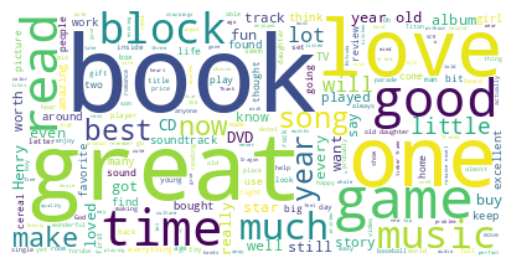

In [98]:
# Create and generate a word cloud image
cloud_positives = WordCloud(background_color='white').generate(positive_reviews)

# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation='bilinear')
plt.axis("off")

# Don't forget to show the final image
plt.show()

In [100]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]

# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the length of each review
reviews['n_words'] = len_tokens
reviews

,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109
...,...,...,...
9995,1,A revelation of life in small town America in...,175
9996,1,Great biography of a very interesting journal...,153
9997,0,Interesting Subject; Poor Presentation: You'd...,122
9998,0,Don't buy: The box looked used and it is obvi...,33


# Step 2: Building a vectorizer
In this exercise, you are asked to build a TfIDf transformation of the review column in the reviews dataset. You are asked to specify the n-grams, stop words, the pattern of tokens and the size of the vocabulary arguments.

This is the last step before we train a classifier to predict the sentiment of a review.

Make sure you specify the maximum number of features properly, as a very large vocabulary size could disconnect your session.

In [103]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build the vectorizer
vect = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS), ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(reviews.review)
# Create sparse matrix from the vectorizer
X = vect.transform(reviews.review)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

score= reviews.score
reviews_transformed= pd.concat([score, reviews_transformed], axis=1)

#transfomed the text column using the TfidfVectorizer and created 200 numeric columns from the review.
# You are now ready to build a binary classifier predicting the sentiment of a review.

Top 5 rows of the DataFrame: 
    able  action  actually  ago  album   amazing  amazon  author      away  \
0   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.274041   
1   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
2   0.0     0.0       0.0  0.0    0.0  0.382773     0.0     0.0  0.000000   
3   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
4   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   

   bad  ...      work  works  world  worst     worth  writing  written  wrong  \
0  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
1  0.0  ...  0.000000    0.0    0.0    0.0  0.219408      0.0      0.0    0.0   
2  0.0  ...  0.142935    0.0    0.0    0.0  0.160089      0.0      0.0    0.0   
3  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
4  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   

   year     years  

### Step 3: Building a classifier
This is the last step in the sentiment analysis prediction. We have explored and enriched our dataset with features related to the sentiment, and created numeric vectors from it.

You will use the dataset that you built in the previous steps. Namely, it contains a feature for the length of reviews, and 200 features created with the Tfidf vectorizer.

Your task is to train a logistic regression to predict the sentiment. The data has been imported for you and is called reviews_transformed. The target is called score and is binary : 1 when the product review is positive and 0 otherwise.

Train a logistic regression model and evaluate its performance on the test data. How well does the model do?

All the required packages have been imported for you.

In [104]:
# Define X and y
y = reviews_transformed.score
X = reviews_transformed.drop('score', axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.789
[[0.412 0.114]
 [0.097 0.377]]
